<a href="https://colab.research.google.com/github/evibeq/FaceRecognitionCNN/blob/main/FaceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Il progetto [ipazc/MTCNN](https://github.com/ipazc/mtcnn) fornisce un'implementazione dell'architettura MTCNN utilizzando TensorFlow e OpenCV. I due principali benefici di questo progetto sono:

*   la possibilità di utilizzare un modello performante e pre-addestrato;
*   la possibilità di installare il modello come una libreria pronta all'uso nel proprio codice.

## MTCNN
Tecnicamente MTCNN è composto da un prepassaggio e 3 CNN, non direttamente collegate tra di loro. Per prima cosa l'immagine viene ridimensionata a scale diverse per costruire una image pyramid, che sarà l'input della prima delle reti, dopodichè:

### 1. Proposal Network (P-Net)
É una fully connected network (FCN). Meno profonda delle prossime CNN, viene utilizzata per ottenere finestre candidate a contenere volti.  
<img src='https://drive.google.com/uc?id=1XQKluW0_5pru_-X80OJduz9_7kXbzjVg'>

### 2. Refine Network (R-Net)
Tutte le finestre vengono inviate a questa CNN che riduce ulteriormente il numero di candidati a contenere un viso, esegue una bounding box regression e utilizza la non-maxiam suppression (NMS) per unire i candidati sovrapposti. L'ouput sarà la conferma della presenza di effetivo volto.  
<img src='https://drive.google.com/uc?id=1ymIh--XX_fdvmclC10xLJIGAznb6xq4A'>

## 3.Output network (O-Net)
Questo passaggio è simile alla R-Net, ma il suo obiettivo è di descrivere il viso più nel dettaglio individuando i 5 facial landmarks.  
<img src='https://drive.google.com/uc?id=1nrOnIpqFCif5sI8VFZE8dm7wH2kghvh9'>

#ipazc/MTCNN

In [ ]:
# Nascondiamo i warning per una lettura facile dei risultati
import warnings; warnings.simplefilter('ignore')

In [ ]:
#installa la libreria attraverso pip
!pip install mtcnn

     |████████████████████████████████| 2.3MB 12.5MB/s 


In [ ]:
# verifica se mtcnn è stato installato correttamente, stampandone la versione
import mtcnn
print(mtcnn.__version__)

0.1.0


`model = MTCNN(weights_file='filename.npy')` per utilizzare il tuo modello personale, addestrato su un tuo dataset. Nel seguito invece verà utilizzato il modello preaddestrato di default.  
`min_face-size` per settare la dimensione minima del filtro quadrato, che rileva i visi. Di default è 20 pixel.  
`scale_factor` per specificare lo scale factor per l'immagine di input. Di default è 0.709.  
  
Una volta configurato e caricato, il modello può essere direttamente utilizzato per rilevare i volti utilizzando la funzione `detect_faces()`.  
Questa ritorna una lista di oggetti, ognuno accompagnato da un numero che descrive il dettaglio, tra cui:  
`box` contenente x,y dell'angolo basso-sinistro del bounding box con, inoltre, la larghezza e l'altezza;  
`confidence` contente la probabilità della correttezza della predizione;  
`keypoints` contenente le coordinate dei punti 'left_eye', 'right_eye', 'nose', 'mouth_left' e 'mouth_right'.

In [ ]:
#collega e monta drive per poter importare le foto su cui fare face detection
from google.colab import drive
drive.mount ('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
import os
from matplotlib import pyplot
# incolla qui il percorso della cartella dove si trovano le foto
dir = '/gdrive/MyDrive/FaceDetection/'

#definisce l'immagine su cui vogliamo fare face detection
filename = 'test2.jpg'
image = pyplot.imread(dir + filename)

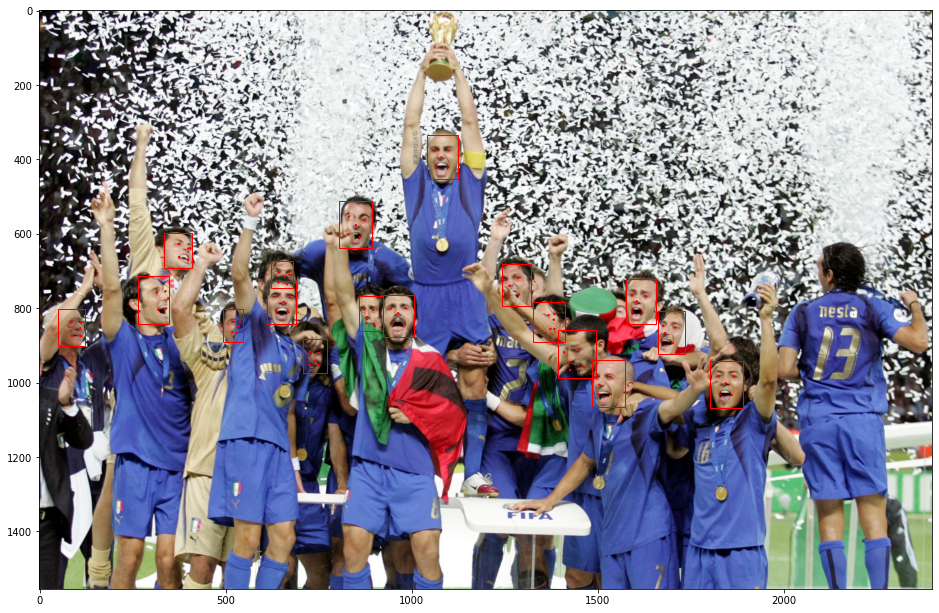

{'box': [610, 727, 79, 116], 'confidence': 0.9999822378158569, 'keypoints': {'left_eye': (636, 768), 'right_eye': (673, 770), 'nose': (656, 783), 'mouth_left': (636, 810), 'mouth_right': (669, 811)}}
{'box': [859, 767, 65, 95], 'confidence': 0.9999722242355347, 'keypoints': {'left_eye': (871, 804), 'right_eye': (898, 804), 'nose': (880, 824), 'mouth_left': (878, 841), 'mouth_right': (899, 842)}}
{'box': [335, 599, 74, 93], 'confidence': 0.999955415725708, 'keypoints': {'left_eye': (375, 627), 'right_eye': (405, 639), 'nose': (399, 640), 'mouth_left': (375, 663), 'mouth_right': (399, 671)}}
{'box': [922, 764, 84, 113], 'confidence': 0.9999510049819946, 'keypoints': {'left_eye': (945, 800), 'right_eye': (984, 800), 'nose': (964, 814), 'mouth_left': (948, 845), 'mouth_right': (979, 846)}}
{'box': [805, 513, 88, 125], 'confidence': 0.9999313354492188, 'keypoints': {'left_eye': (831, 554), 'right_eye': (873, 562), 'nose': (850, 577), 'mouth_left': (830, 601), 'mouth_right': (861, 609)}}
{'b

In [ ]:
# importano le librerie necessarie
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
 
# funzione che mostra l'immagine con i visi rilevati attraverso dei quadrati e i keypoints con dei punti
def draw_image_with_boxes(filename, result_list):
	# carica l'immagine
	data = pyplot.imread(dir + filename)
	# fa plot dell'immagine
	pyplot.imshow(data)
	# trova il contesto del box
	ax = pyplot.gca()
	# plot di ogni riquadro
	for result in result_list:
		# prende le coordiante
		x, y, width, height = result['box']
		# crea la forma
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# disegna il riquadro
		ax.add_patch(rect)
    # ciclo che si occupa di disegnare i punti per i landmark keypoints
		for key, value in result['keypoints'].items():
			# crea e disegna un punto
			dot = Circle(value, radius=2, color='red')
			ax.add_patch(dot)
	# mostra infine il plot
	pyplot.show()
 
# crea il detector, usando i pesi di default del modello pre-allenato
detector = MTCNN()
# ricerca i visi nell'immagine
faces = detector.detect_faces(image)
#ingrandisce l'immagine per vedere meglio il risultato
pyplot.figure(figsize=(16,20))
# utilizziamo la funzione di sopra per mostrare i visi sull'immagine originale
draw_image_with_boxes(filename, faces)
# stampiamo il contenuto di ogni oggetto faccia
for face in faces:
	print(face)

Potremmo inoltre voler estrarre le facce che abbiamo individuato e passarle come input ad un altro sistema. Possiamo fare ciò estraendo direttamente i pixel dall'immagine nel seguente modo:



```
# prendiamo le coordinate del box
x1, y1, width, height = result['box']
x2, y2 = x1 + width, y1 + height
# estraiamo il viso
face = data[y1:y2, x1:x2]
```
Creaimo pertanto una funzione che estrae tutte le facce rilevate e le "plotta" come subplot separati.

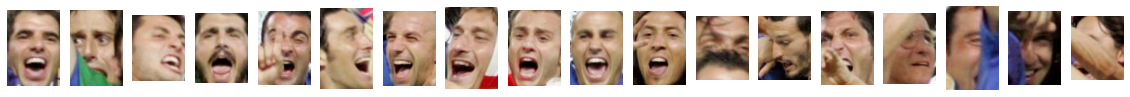

In [ ]:
# stampa ogni faccia separatamente
def draw_faces(filename, result_list):
	# carica l'immagine
	data = pyplot.imread(dir + filename)
	# plotta ogni faccia come subplot
	for i in range(len(result_list)):
		# prende le coordinate
		x1, y1, width, height = result_list[i]['box']
		x2, y2 = x1 + width, y1 + height
		# definisce subplot
		pyplot.subplot(1, len(result_list), i+1)
    # nasconde gli assi del plot
		pyplot.axis('off')
		# plotta facce
		pyplot.imshow(data[y1:y2, x1:x2])
	# mostra il plot
	pyplot.show()
 
#ingrandisce l'immagine per vedere meglio il risultato
pyplot.figure(figsize=(20,25))
# funzione definita qui sopra
draw_faces(filename, faces)